# K-nearest Neighbors
 kNN algorithm is used to find the nearest neighbors of a new data point. It is used to classify new data point in a dataset. It is also used to predict the output of a new data point. 
- IN knn, we need to find the nearest neighbors of a new data point. We do this by calculating the distance between the new data point and all the data points in the dataset. 

### Classification using KNN Model

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load iris dataset from sns library
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# split the data into X and y
X=df.drop('species',axis=1)
y=df['species']

In [6]:
# load and fit the KNN classifer on data
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)

#predti the specis for new set of measuremeents
model.predict([[5.1,3.5,1.4,0.2]])


array(['setosa'], dtype=object)

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit the model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

# predict
y_pred=model.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98


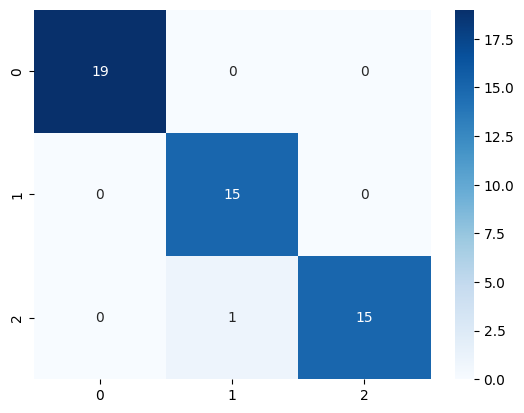

In [14]:
# draw confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='Blues')
plt.show()

### Regression using KNN Model

In [15]:
# import libraries of regressing algorithm KNN
from sklearn.neighbors import KNeighborsRegressor

# load the dataset of tips
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# Split the data into X and y
X=df.drop('tip',axis=1)
y=df['tip']


In [24]:
# encode the catagorical columns using for loop le
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.columns:
    if X[col].dtypes=='object' or X[col].dtypes=='category':
        X[col]=le.fit_transform(X[col])
        

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# fit the model
model=KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train,y_train)

KNeighborsRegressor()

In [27]:
#evaluate the model
y_pred=model.predict(X_test)

In [32]:
# evalauate the model
from sklearn.metrics import r2_score, mean_squared_error
print(f"r2_score: {r2_score(y_test,y_pred)}")
print(f"mean_squared_error: {mean_squared_error(y_test,y_pred)}")

r2_score: 0.26383231471548707
mean_squared_error: 0.9551199999999999


In [36]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [39]:
# predit the specfic values
model.predict([[19.82, 0,1,1,0,2]])

array([3.04])